# Part 1: Data Cleaning and Preparation
---
<font size="3">We noticed that certain images are not blobbed correctly after running the blob2.py file. Therefore, our initial step in the project was to clean and prepare the dataset. This process aimed to extract relevant information from the dataset and address the question we posed.

<font size="3">**Question:** Would it be possible to achieve detection of fire via images?

<font size="3">**Dataset:** [FIRE Dataset on Kaggle](https://www.kaggle.com/datasets/phylake1337/fire-dataset)
    
<img align="center" src="./images/IntroPic.jpeg" width="500">

In [264]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import yeojohnson
import statsmodels.api as sm
import warnings

# Ignores minor warning
warnings.filterwarnings("ignore", category=UserWarning)

# Set Default Style For Seaborn
sb.set()

## Importing Dataset

In [265]:
# Read the output file created by the blob2.py
output_data = pd.read_csv('output/output_stats.csv')
# Taking a quick glance at the records
output_data

,image_name,size,avg_b,avg_g,avg_r,avg_h,avg_s,avg_v,std_b,std_g,std_r,std_h,std_s,std_v,blob_count,fire
0,fire.753.png,212006.249406,12.762858,58.227147,128.101673,23.471463,90.183275,50.235950,14.344682,32.551522,56.165869,27.394566,73.766898,22.089614,196,1
1,fire.12.png,89993.726291,79.223567,94.076952,120.520141,22.697020,34.083370,47.262800,34.028104,40.216131,47.696931,54.450719,26.780617,18.747861,674,1
2,fire.747.png,127812.689117,11.252800,50.830994,146.716680,17.358378,92.243588,57.535953,16.273683,30.098781,55.654497,22.142658,70.165380,21.828507,112,1
3,non_fire.134.png,74.031425,79.740180,98.578563,112.221661,33.281164,28.724898,44.008495,35.130677,37.466454,38.219430,98.858972,10.754184,15.152674,109,0
4,non_fire.120.png,60543.177855,30.268923,56.112125,83.654148,29.062445,63.831749,32.805548,20.011667,27.694207,32.653572,42.011713,37.239195,12.812618,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,non_fire.105.png,3572.663253,61.677173,134.101486,153.048860,47.195778,60.704673,60.019161,43.256935,49.891797,52.677128,64.005410,19.288945,20.795986,1135,0
994,non_fire.111.png,44263.831015,40.544953,77.078043,92.381158,40.596951,55.156732,36.227905,23.371124,35.151004,36.411559,59.935268,35.255025,14.314416,359,0
995,non_fire.139.png,72203.953299,48.689633,81.162745,94.796882,41.738855,48.645155,37.175248,28.332560,31.640191,32.641139,54.236804,13.312730,12.845786,767,0
996,fire.37.png,2887.842553,134.745682,159.235544,223.215770,17.176032,39.593107,87.535596,18.603283,27.245786,26.462156,65.558191,34.891504,10.974747,14,1


In [266]:
# Obtain general information on unfiltered dataset
output_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  998 non-null    object 
 1   size        998 non-null    float64
 2   avg_b       998 non-null    float64
 3   avg_g       998 non-null    float64
 4   avg_r       998 non-null    float64
 5   avg_h       998 non-null    float64
 6   avg_s       998 non-null    float64
 7   avg_v       998 non-null    float64
 8   std_b       998 non-null    float64
 9   std_g       998 non-null    float64
 10  std_r       998 non-null    float64
 11  std_h       998 non-null    float64
 12  std_s       998 non-null    float64
 13  std_v       998 non-null    float64
 14  blob_count  998 non-null    int64  
 15  fire        998 non-null    int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 124.9+ KB


<font size="3">Listing down our observations from the dataset</font>
* <font size="3">There are `16` variables/columns and `998` observations/rows in the dataset. </font>
* <font size="3">The response variable is `fire`, while the remaining 14 (except image_name) are predictors.    </font> 
* <font size="3">There are `13` variables identified as `float64` by default each of them are giving the average values of B,G,R and H,S,V as well as the standard deviation of those values</font>
* <font size="3">There are `2` variables identified as `int64` by default</font>
  * <font size="3">`blob_count` representing the number of blobs in the picture</font>
  * <font size="3">`fire` denoting whether there is a fire in the picture or not. `1` representing the presence of a fire and `0` representing the absence of fire </font>

## Checking Rows With Zeros

<font size="3">We have discovered that some rows in the dataset consist entirely of zeros, these occurs as during the blobbing process the blobs are filtered out by taking in only above certain sizes. After some analysis, we found that this usually happens to non-fire images therefore keeping these rows could help to identify non-fire images. To validate the blobbing, we plan to cross-check the file names associated with these rows containing zeros. If all the file names start with "non-fire", it suggests that the blobbing was performed correctly.</font>

In [267]:
# Initialize a variable to track if all rows are verified
all_verified = True

# Iterate through each row of the DataFrame
for index, row in output_data.iterrows():
    # Check if size is 0 and image_name starts with "non-fire"
    if row['size'] == 0 and not row['image_name'].startswith('non_fire'):
        # Print information on rows with size 0 and image_name that starts with 'fire' (if any)
        print(f"Row {index}: Size is 0 but image_name does not start with 'non-fire': {row['image_name']}")
        # If conditions are not met, set all_verified to False and break the loop
        all_verified = False
        break

# Print the result
print("All verified:", all_verified)

All verified: True


<font size="3">From the above, we can conclude that the blobbing was performed correctly despite having rows with all zeros</font>

# Part 2: Exploratory Data Analysis
---
<font size="3">Lets start by exploring the amount of fire and non-fire images</font>

<Figure size 1000x600 with 0 Axes>

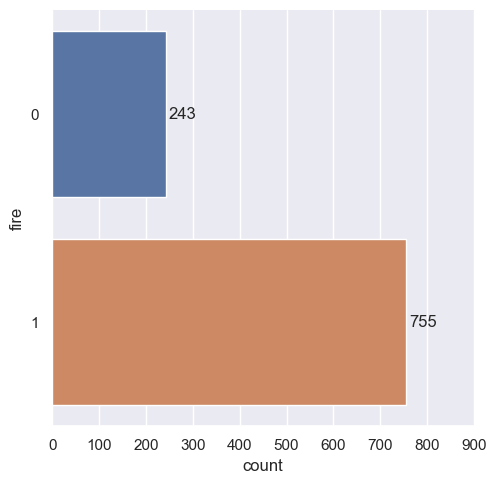

In [360]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Creat plot
g = sb.catplot(y = 'fire', data = output_data, kind = 'count')

# Adjust x-axis limits
g.ax.set_xlim(0, 900)

# Add annotations to each bar
for p in g.ax.patches:
    g.ax.annotate(int(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha = 'center', va = 'center', 
                   xytext = (12, 0), 
                   textcoords = 'offset points')

# Show the plot
plt.show()

<font size="3">The dataset predominantly comprises images containing fire. To ensure unbiased results, we will <b>rebalance</b> the dataset by <b>undersampling the fire images</b>, ensuring a balanced representation of fire and non-fire images. Undersampling helps prevent overfitting and ensures a more accurate reflection of the true distribution of the minority class.</font>

<font size="3">But before rebalancing, let's explore the spread of data</font>

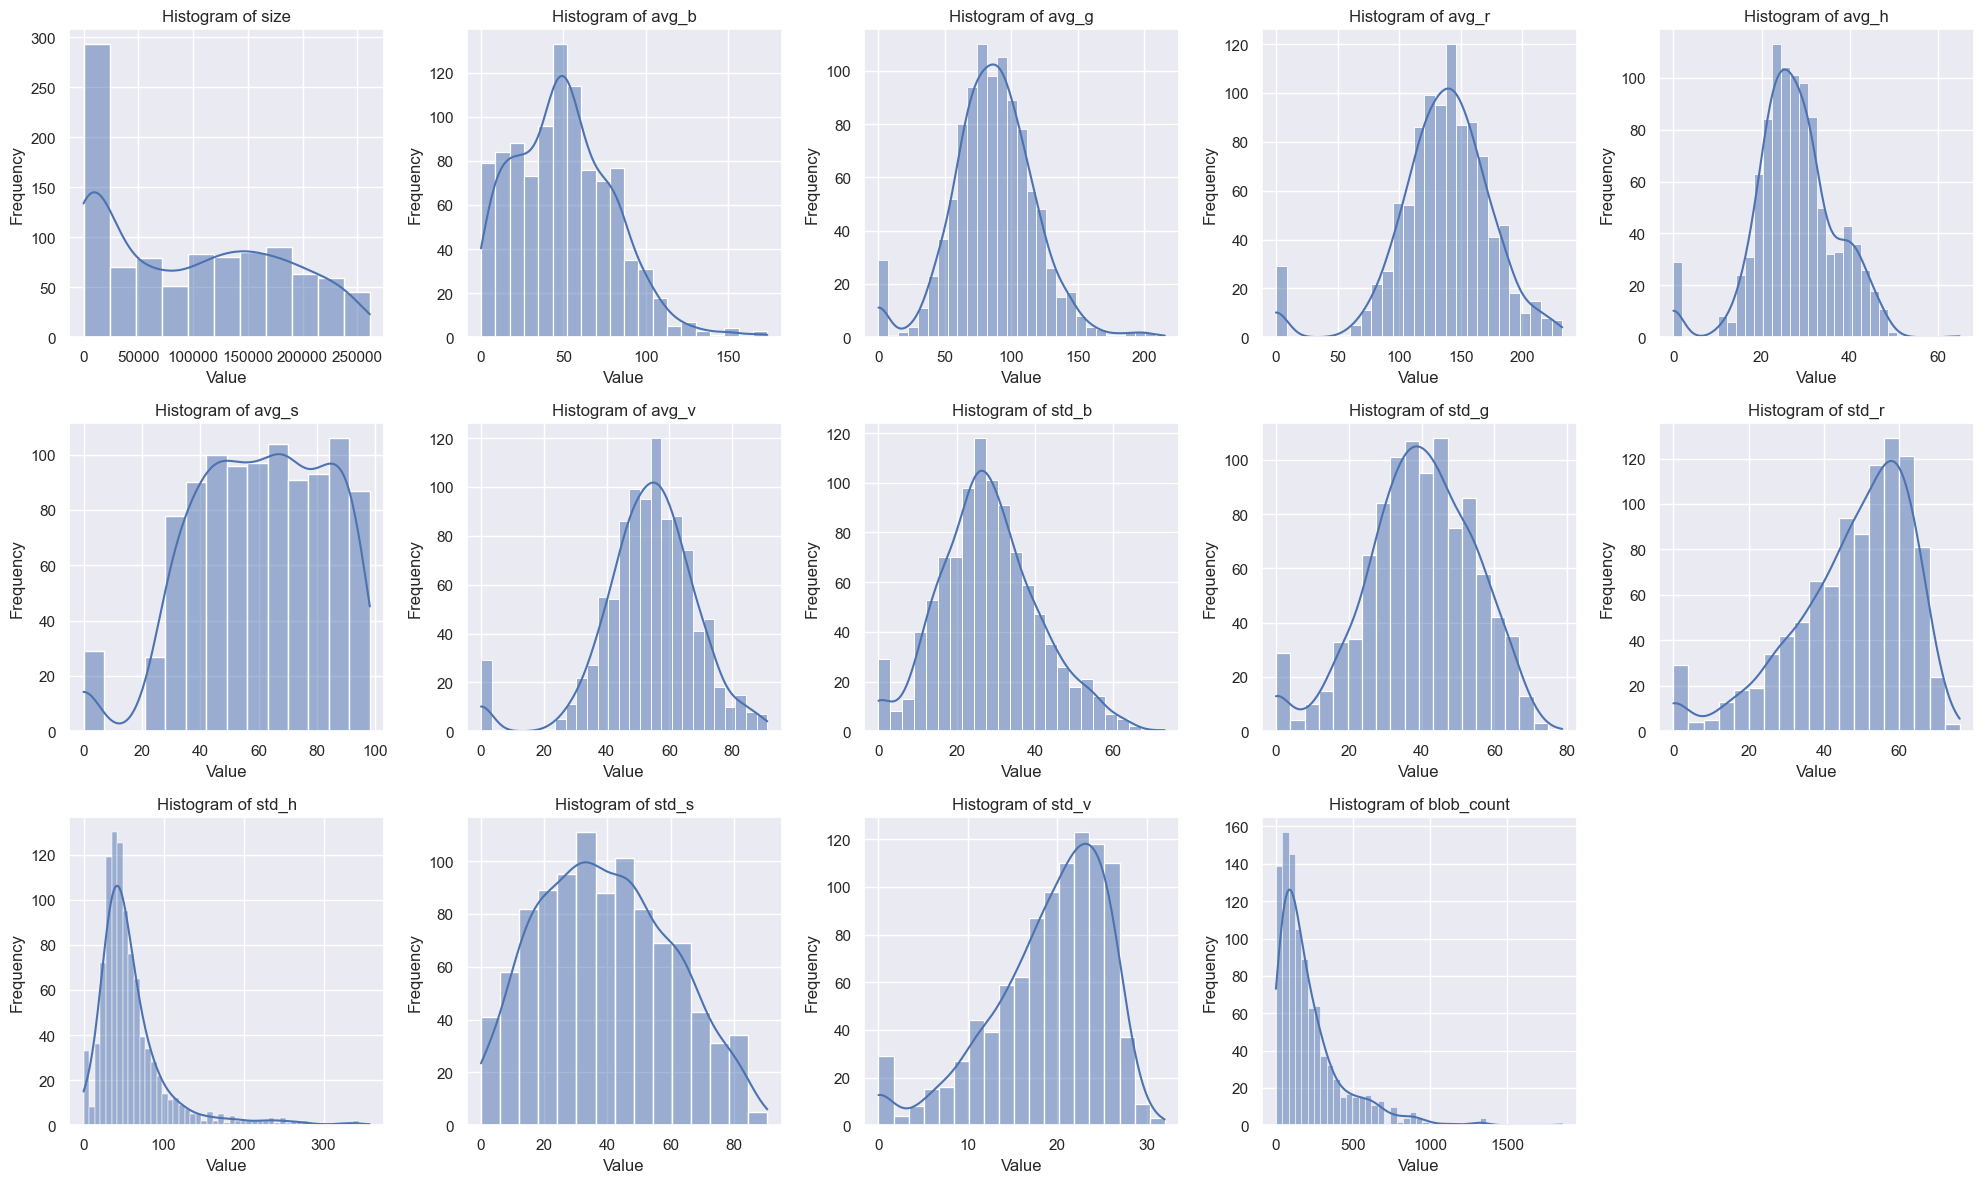

In [362]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Only 14 variables needed to be displayed
fig.delaxes(axes[2][4])

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for numerical columns (histplot)
for i, col in enumerate(output_data.columns[1:-1]):
    ax = axes[i]
    sb.histplot(output_data[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
# Tighten layout and display the plot
plt.tight_layout()
plt.show()

<font size="3">Take note of the distribution of the data as we will compare it against when the data is rebalanced.</font>

## Rebalancing Of Data

In [333]:
from sklearn.utils import resample

# Separate majority and minority classes
fire_majority = transformed_data[transformed_data['fire'] == 1]
non_fire_minority = transformed_data[transformed_data['fire'] == 0]

# Downsample the majority class (fire) to match the minority class (non-fire)
fire_downsampled = resample(fire_majority, 
                            replace=False,    # sample without replacement
                            n_samples=len(non_fire_minority),    # match the number in minority class
                            random_state=42)  # reproducible results

# Combine downsampled majority class with minority class
balanced_data = pd.concat([fire_downsampled, non_fire_minority])

# Confirm balanced class distribution
print(balanced_data['fire'].value_counts())

fire
1    243
0    243
Name: count, dtype: int64


<font size="3">Now that the amount of fire and non-fire data is balanced, we will check the spread of the data to see if we can find specific variables as predictors instead of using all 14 of them.</font>

## Observing Variables' Distribution After Rebalancing

<font size="3">We will display each of the columns from the dataset in the form of histogram to observe dataset if cleaning is required</font>

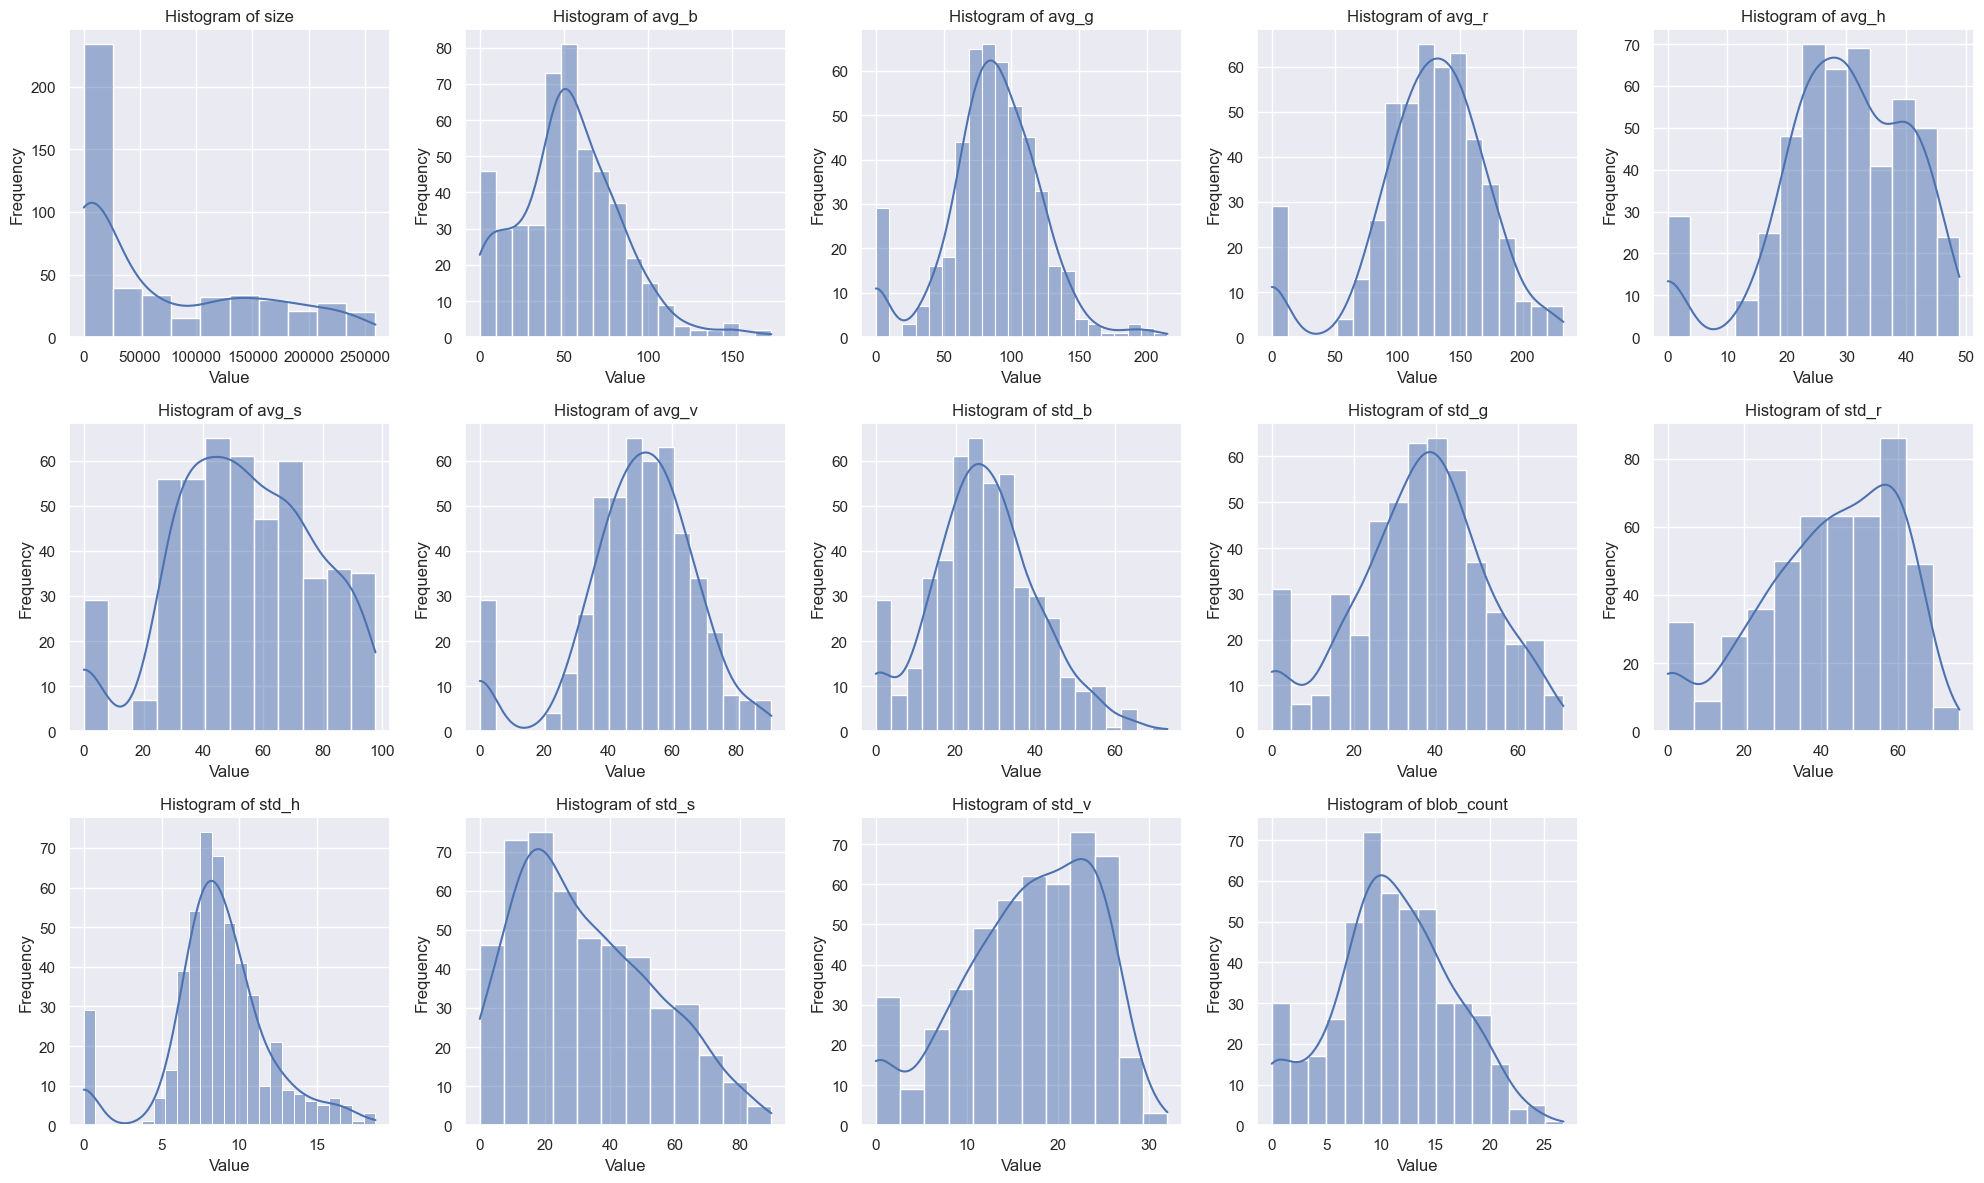

In [351]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

# Only 14 variables needed to be displayed
fig.delaxes(axes[2][4])

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for numerical columns (histplot)
for i, col in enumerate(balanced_data.columns[1:-1]):
    ax = axes[i]
    sb.histplot(balanced_data[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
# Tighten layout and display the plot
plt.tight_layout()
plt.show()

<font size="3">From the observations above together with the original variables' distribution, we realised that `std_h` and `blob_count` is the most right skewed. This skewness could introduce biasness towards images containing fire. To mitigate this issue and ensure the integrity of our statistical analyses, we have opted to normalise the data using <b>Yeo-Johnson</b> transformation, this is to ensure the validity and reliability of statistical analyses.</font>

## Yeo-Johnson Transformation

<font size="3">The Yeo-Johnson transformation is specifically preferred due to its capability to handle negative values. Unlike some other transformations, the Yeo-Johnson transformation does not necessitate specifying an initial guess for the transformation parameter λ. It's important to note that, in this context, the transformation considers 0 as a negative value.</font>

In [368]:
# List of columns to transform
columns_to_transform = ['std_h', 'blob_count']

# Make a copy as transformed_data to avoid modifying the original DataFrame
transformed_data = balanced_data.copy()

# Apply the Box-Cox transformation to each column in columns_to_transform
for col in columns_to_transform:
    transformed_column, lambda_value = yeojohnson(transformed_data[col])
    # Replace the original column with the transformed values in transformed_data
    transformed_data[col] = transformed_column

## Display of std_h and blob_count skewness

<font size="3">We will display the distribution of data using Q-Q plot, a desirable transformation is when the data points fall approximately along the straight line as it suggests that the data follows the normal distribution well.</font>

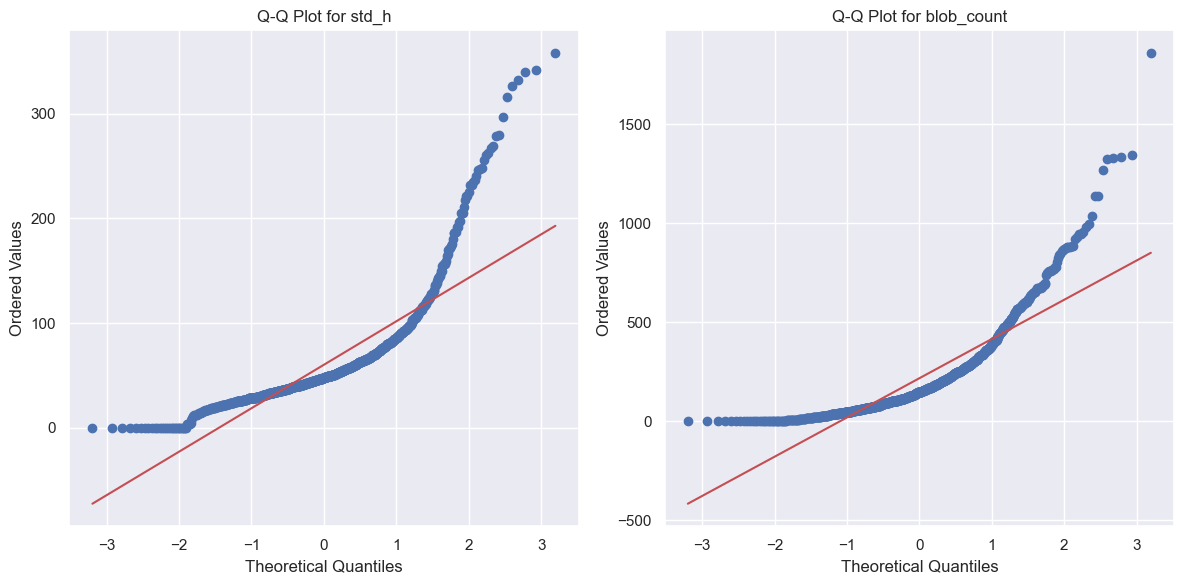

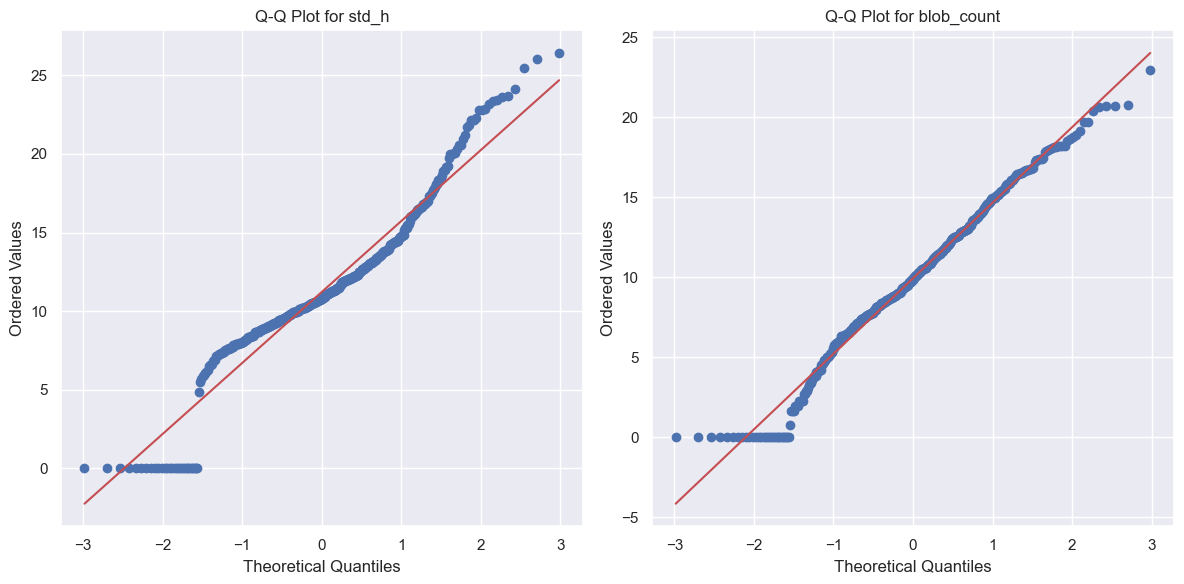

Skewness Before Transformation (std_h):
2.7436894227545956
Skewness After Transformation (std_h):
0.10035004465265032
Skewness Before Transformation (blob_count):
2.1867003938785365
Skewness After Transformation (blob_count):
-0.14742659858593157


In [369]:
# Set up subplots for Q-Q plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform), figsize=(12, 6))

# Create Q-Q plots for each column (Before Transformation)
for i, col in enumerate(columns_to_transform):
    ax = axes[i]
    # Generate Q-Q plot
    stats.probplot(output_data[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot for {col}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

# Set up subplots for Q-Q plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform), figsize=(12, 6))

# Create Q-Q plots for each column (After Transformation)
for i, col in enumerate(columns_to_transform):
    ax = axes[i]
    # Generate Q-Q plot
    stats.probplot(transformed_data[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot for {col}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Ordered Values')


plt.tight_layout()
plt.show()

skewness_before = output_data['std_h'].skew()
print("Skewness Before Transformation (std_h):")
print(skewness_before)

skewness_after = transformed_data['std_h'].skew()
print("Skewness After Transformation (std_h):")
print(skewness_after)

skewness_before = output_data['blob_count'].skew()
print("Skewness Before Transformation (blob_count):")
print(skewness_before)

skewness_after = transformed_data['blob_count'].skew()
print("Skewness After Transformation (blob_count):")
print(skewness_after)

<font size="3">Although some data points with an ordered value of 0 remain unchanged after the transformation, the overall skewness of the data has improved. Additionally, the distribution now more closely resembles a normal distribution.</font>

## Spread Of Data From Predictors

In [370]:
transformed_data[['avg_r','avg_g','avg_b', 'avg_h', 'avg_s', 'avg_v']].describe()

,avg_r,avg_g,avg_b,avg_h,avg_s,avg_v
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,126.299841,86.767273,52.847449,29.421245,53.542325,49.529843
std,46.160916,35.704908,30.895865,11.236807,23.799852,18.102190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.967805,69.354900,32.832203,23.249574,36.920930,40.379531
50%,129.349840,87.507610,51.530036,30.111420,53.367172,50.725427
75%,155.185436,108.272671,70.755387,38.463453,70.546802,60.857034
max,232.425532,215.276596,173.602202,48.978649,97.635720,91.147267


In [371]:
transformed_data[['std_r','std_g','std_b', 'std_h', 'std_s', 'std_v']].describe()

,std_r,std_g,std_b,std_h,std_s,std_v
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,41.730863,35.869034,27.155965,11.222012,32.161336,16.787063
std,18.366721,16.159856,13.443243,4.644794,21.143693,7.456329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.524328,26.322400,18.983936,9.033222,15.750781,11.702642
50%,44.246887,37.158565,26.630213,10.807406,28.324231,17.716395
75%,57.023112,46.236414,34.873483,13.248273,47.679684,22.786037
max,76.067808,71.158822,73.140436,26.421400,89.722975,32.038702


<font size="3">Above are numerical predictors for fire classification after rebalancing and transformation, these values are obtained from the blobbing operation of area that contains fire. By blobbing all the different areas within the image, it calculates and produces the average and standard deviation red, green, blue, hue, saturation and value.</font>

# Part 3: Data Driven Insights
---
<font size='3'>We will add all predictors into an array and plot them using boxplot to identify relations between predictors and response.</font>

In [374]:
# All Predictors and Response variable
predictors = ['size', 'avg_b', 'avg_g', 'avg_r', 'avg_h', 'avg_s', 'avg_v', 'std_b', 'std_g', 'std_r', 'std_h', 'std_s', 'std_v']
X = transformed_data[predictors]
y = transformed_data['fire']

## Analysing using boxplots

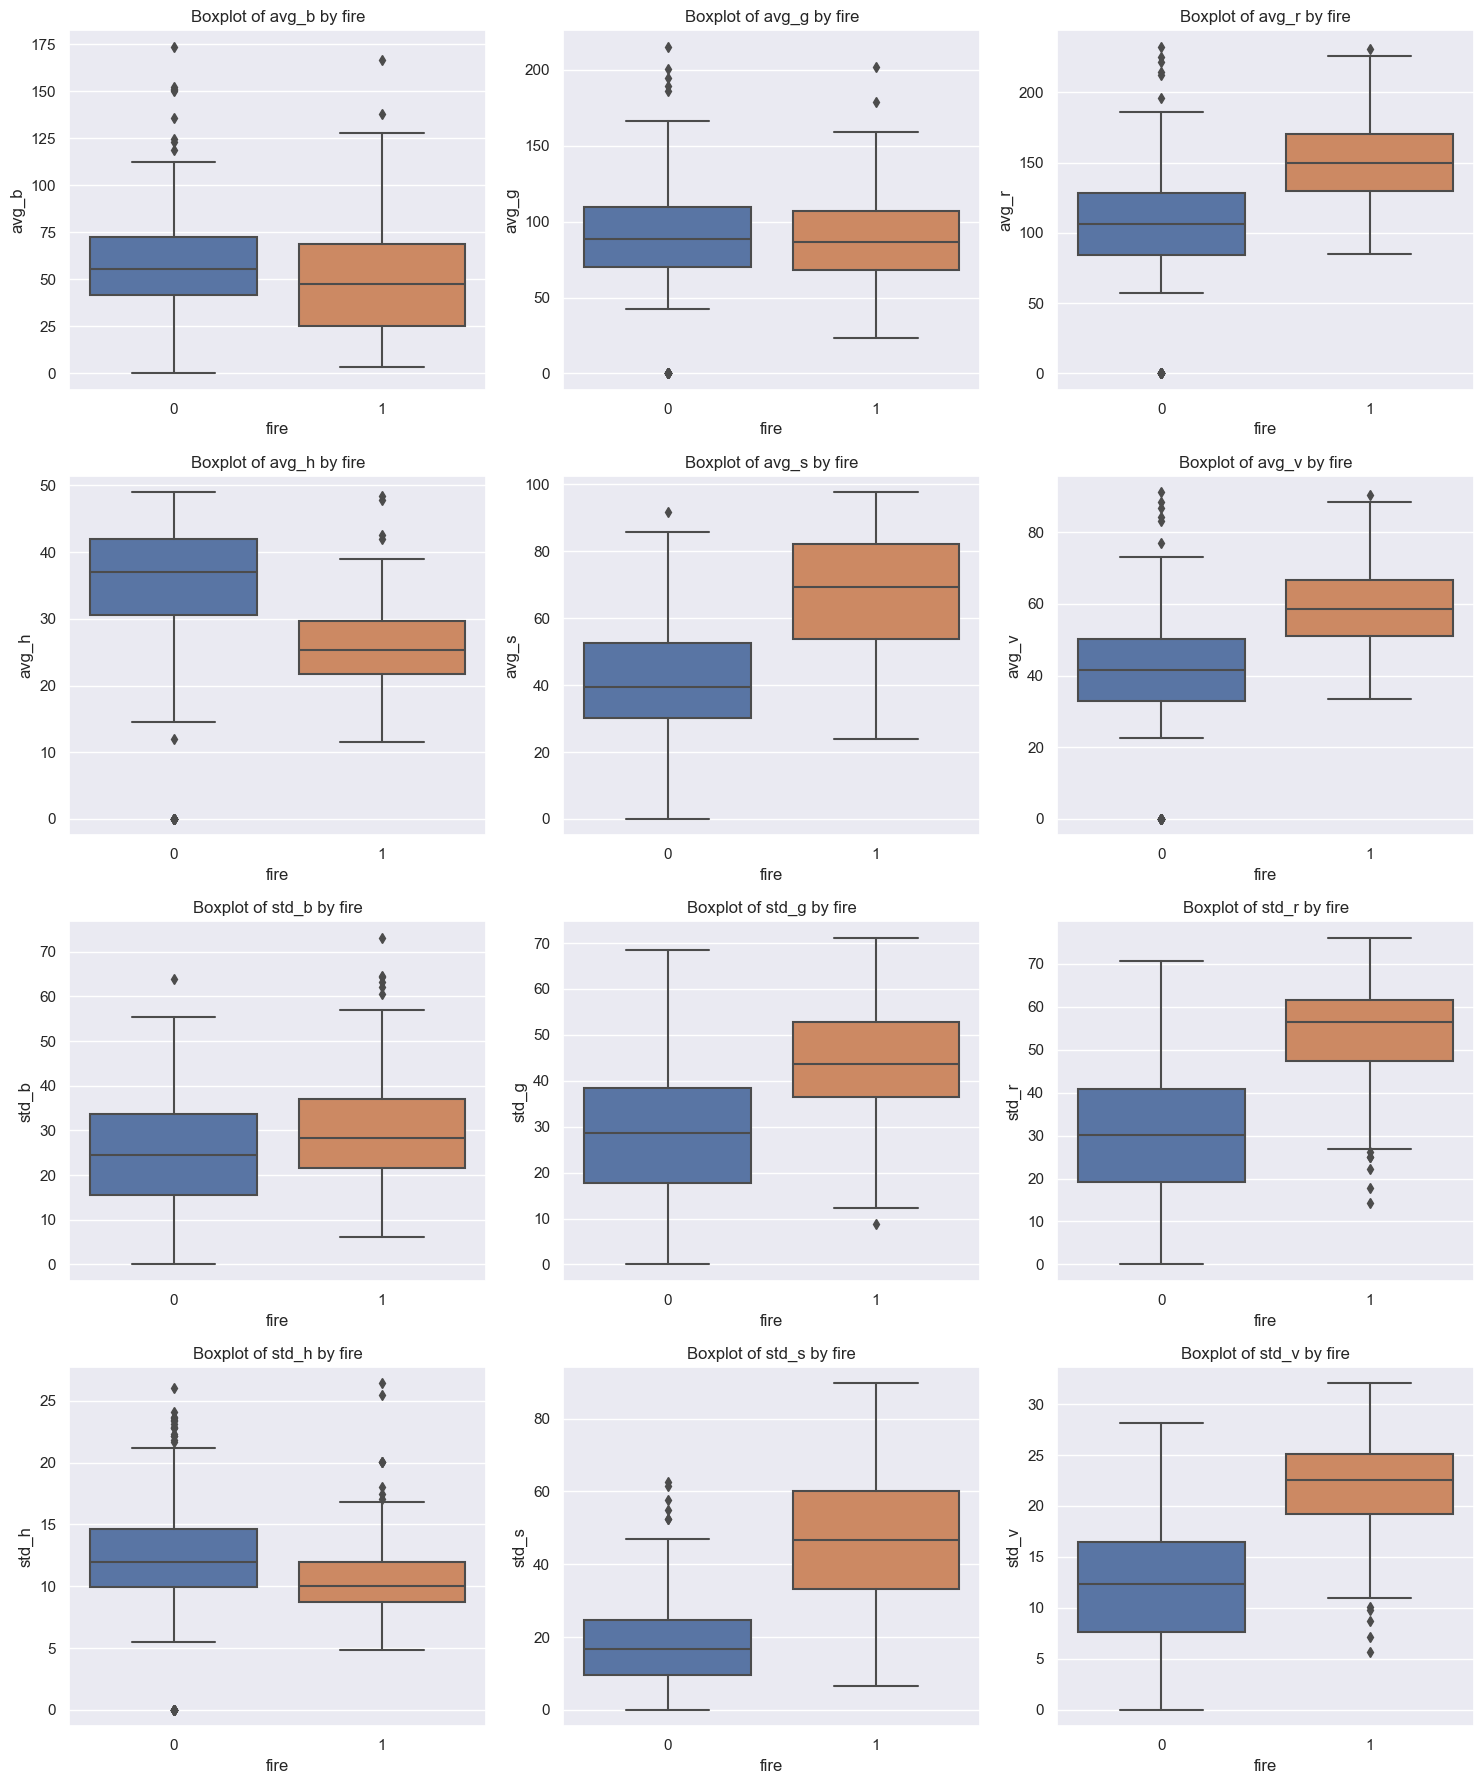

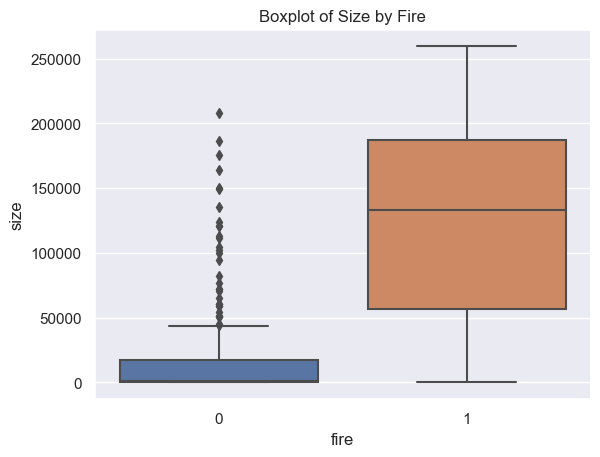

In [375]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

# Select 'avg' and 'std' predictors
avg_predictors = [col for col in transformed_data.columns if 'avg' in col]
std_predictors = [col for col in transformed_data.columns if 'std' in col]

# Plot box plots for 'avg' predictors
for i, predictor in enumerate(avg_predictors):
    sb.boxplot(x='fire', y=predictor, data=transformed_data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Boxplot of {predictor} by fire')
    axes[i//3, i%3].set_xlabel('fire')
    axes[i//3, i%3].set_ylabel(predictor)

# Plot box plots for 'std' predictors
for i, predictor in enumerate(std_predictors):
    sb.boxplot(x='fire', y=predictor, data=transformed_data, ax=axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3])
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_title(f'Boxplot of {predictor} by fire')
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_xlabel('fire')
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_ylabel(predictor)

# Adjust layout
plt.tight_layout()
plt.show()

# Create boxplot for comparing size and fire
sb.boxplot(x='fire', y='size', data=transformed_data)
plt.title('Boxplot of Size by Fire')
plt.show()

<font size="3">From the boxplots, we can see that for <code>avg_r</code>, <code>avg_h</code>, <code>avg_s</code>, <code>avg_v</code>, <code>std_s</code>, <code>std_v</code> have clear differences in their spread of data between a fire and non-fire image. We could further analyse the relation between these variables and their relationship between fire images.</font>

## Analysing using point-biserial correlation (for binary predictors)

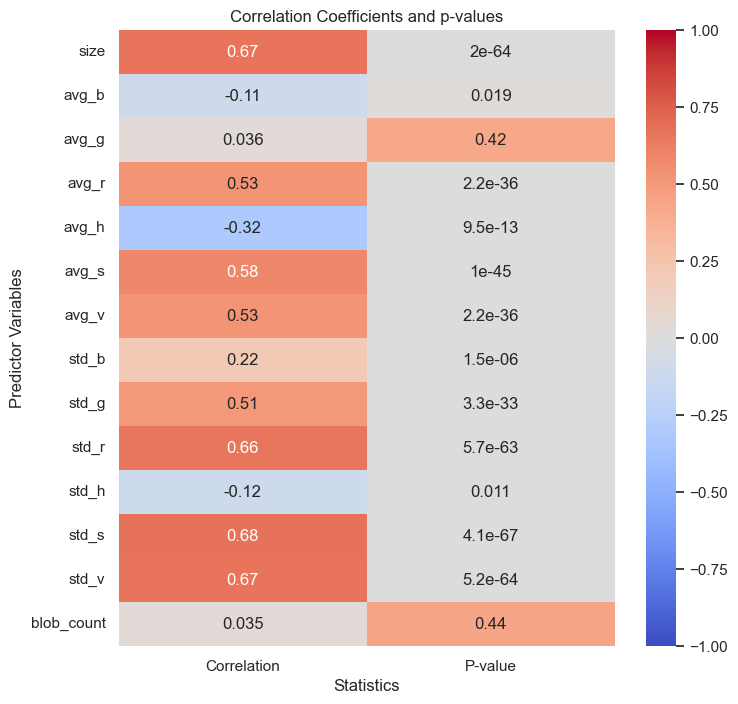

In [376]:
correlation_coefficients = []
p_values = []

# Loop through each column and adding the correlation and pvalues into respective lists
for col in balanced_data.columns[1:-1]:
    c = stats.pointbiserialr(balanced_data['fire'], balanced_data[col])
    correlation_coefficients.append(c.correlation)
    p_values.append(c.pvalue)

# Creating matrix to display in heatmap
matrix = np.array(list(zip(correlation_coefficients, p_values))).reshape(-1, 2)
plt.figure(figsize=(8, 8))
sb.heatmap(matrix, annot=True, cmap='coolwarm', 
            xticklabels=['Correlation', 'P-value'], yticklabels=balanced_data.columns[1:-1], vmin=-1, vmax=1)
plt.title('Correlation Coefficients and p-values')
plt.xlabel('Statistics')
plt.ylabel('Predictor Variables')
plt.show()

<font size="3">Based on point-biserial correlation we can see that `std_r`, `std_s` and `std_v` have the highest positive values suggesting that they tend to take on higher values when `fire` is 1 (presence of fire). Although, size also has a high positive value but it has quite a number of outliers as shown in the boxplot. `std_r`, `std_s` and `std_v` P-values are smaller than 0.05 suggesting that the relationship between these variables are real rather than just a random chance.</font>

## Choosing of Predictors

<font size="3">After analyzing point-biserial correlation and boxplots, we have determined that <code>std_r</code>, <code>std_s</code> and <code>std_v</code> are the most suitable predictors for the response variable. Other variables either exhibit too many outliers or lack clear differences in data spread between fire and non-fire instances, making them less suitable as predictors.</font>

In [410]:
# Selected Predictors for the Response variable
predictors = ['std_s', 'avg_r','std_v']
X = balanced_data[predictors]

# Part 4: Importing Scikit-learn To Train Random Forest Classifier Model
---
<font size="3">We choosed Random Classifier Model as it can handle non-linear relationships and interactions between large amount of features effectively.</font>

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [412]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<font size="3">Normalizing the range of features in dataset to ensure all features contribute equally to the model. This prevents domination of features by larger values.</font>

In [413]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [414]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=25, max_depth=4)
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4, n_estimators=25)

<font size="3">After experimenting around, we found out that having a value of about 25 for the number of trees and 4 for the depth, provides a well-fitted model that would not cause any overfitting of the train set which might lead to the results of the train set having a big gap from the test set.</font>

In [415]:
# Make predictions on the training and test set
y_train_pred = rf_classifier.predict(X_train_scaled)
y_test_pred = rf_classifier.predict(X_test_scaled)

In [416]:
# Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [417]:
# Calculate confusion matrix for both training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Part 5: Goodness Of Fit Of The Model
---
<font size='3'>We will now check if the preictions on the Train & Test Set are good
Metrics Used: Classification Accuracy and Confusion Matrix</font>

Classification Accuracy in train data 	: 0.9226804123711341
Classification Accuracy in test data 	: 0.8469387755102041
TPR for train	: 0.9375
FPR for train	: 0.09183673469387756
TPR for test	: 0.8627450980392157
FPR for test	: 0.1702127659574468


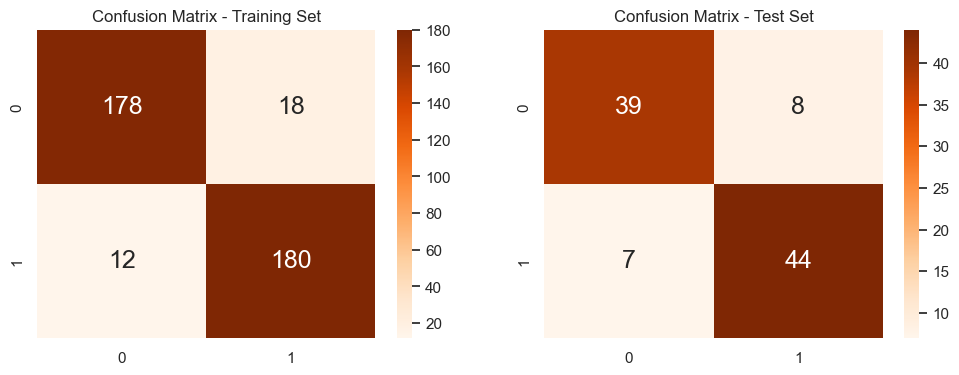

In [418]:
# Function to obtain values of TN, FN, FP, TP, TPR & FPR
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

# Using above function to produce the TPR & FPR, storing it into that 2 elements array
[TPR_train, FPR_train] = binary_metric(y_train, y_train_pred)
[TPR_test, FPR_test] = binary_metric(y_test, y_test_pred)

# Prints classification accuracy, TPR and FPR of train and test
print("Classification Accuracy in train data \t:", accuracy_score(y_train, y_train_pred))
print("Classification Accuracy in test data \t:", accuracy_score(y_test, y_test_pred))
print("TPR for train\t:", [TPR_train, FPR_train][0])
print("FPR for train\t:", [TPR_train, FPR_train][1])
print("TPR for test\t:", [TPR_test, FPR_test][0])
print("FPR for test\t:", [TPR_test, FPR_test][1])

# Create subplots space for confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for training set
sb.heatmap(conf_matrix_train, annot=True, fmt='d', annot_kws={"size" : 18}, cmap='Oranges', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')

# Plot confusion matrix for test set
sb.heatmap(conf_matrix_test, annot=True, fmt='d', annot_kws={"size" : 18}, cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
plt.show()

<font size="3">The accuracy loss between train and test data was not too drastic and proves that the model was well trained for classifying images containing fire.</font>